<a href="https://colab.research.google.com/github/anushrao404/AIML-Internship_ElevateLabs/blob/main/27_5_25_AIML_Internship_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Step 0
import pandas as pd

# Load dataset (you can replace this with your own dataset)
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')


In [2]:
#Step 1: Generate Summary Statistics
# Basic structure
print(df.info())

# Descriptive statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

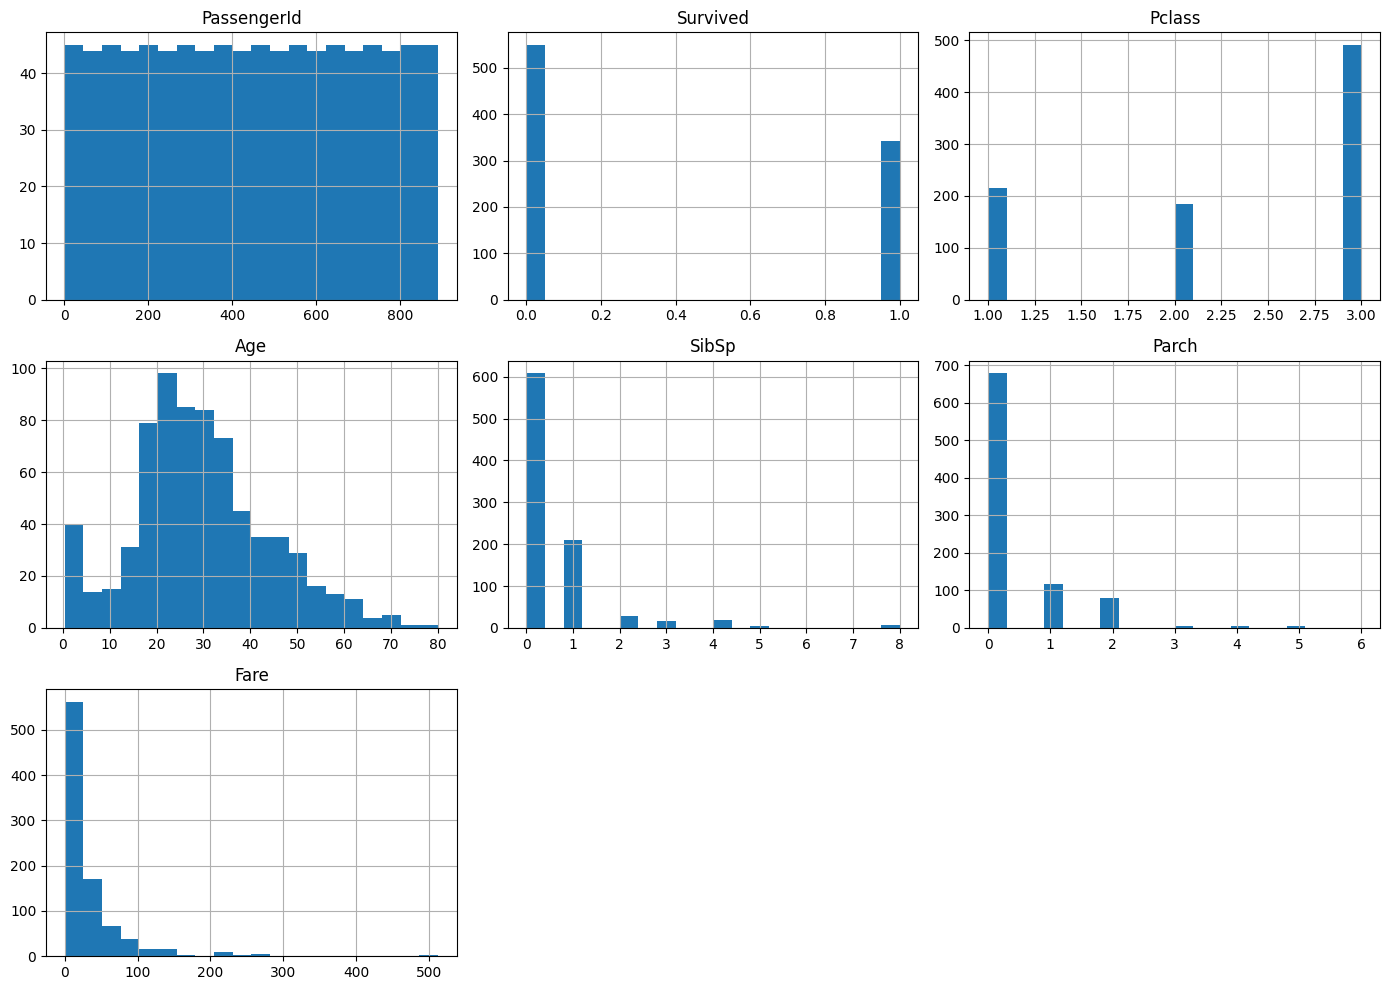

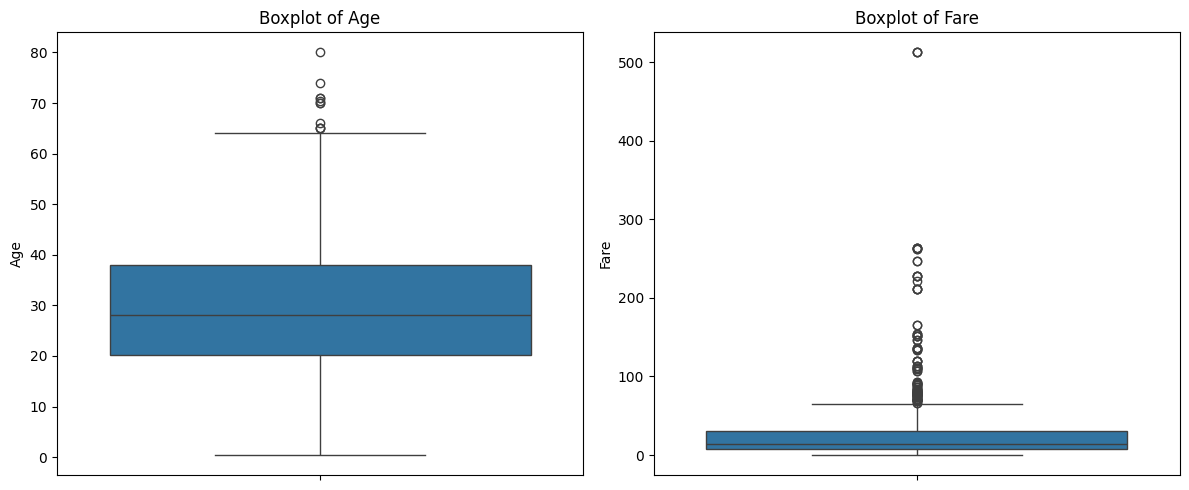

In [3]:
#Step 2: Histograms and Boxplots
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numeric columns
df.hist(bins=20, figsize=(14, 10))
plt.tight_layout()
plt.show()

# Boxplots for age and fare
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y='Age', data=df)
plt.title("Boxplot of Age")

plt.subplot(1, 2, 2)
sns.boxplot(y='Fare', data=df)
plt.title("Boxplot of Fare")

plt.tight_layout()
plt.show()


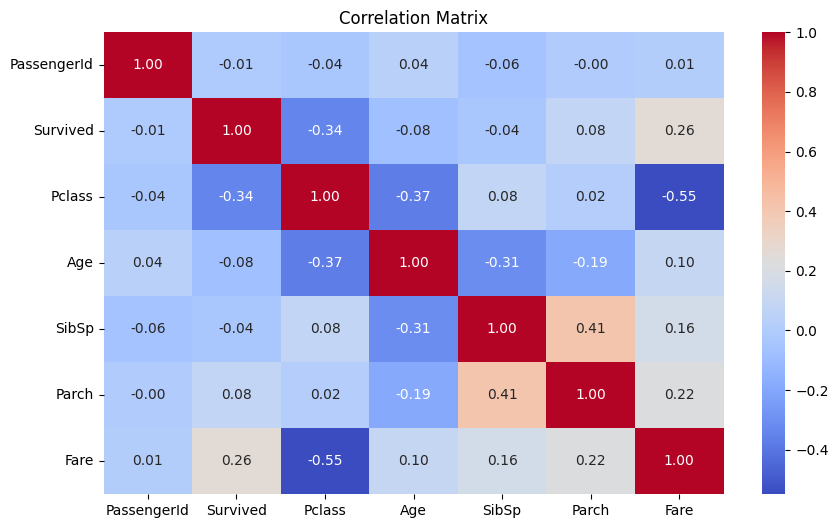

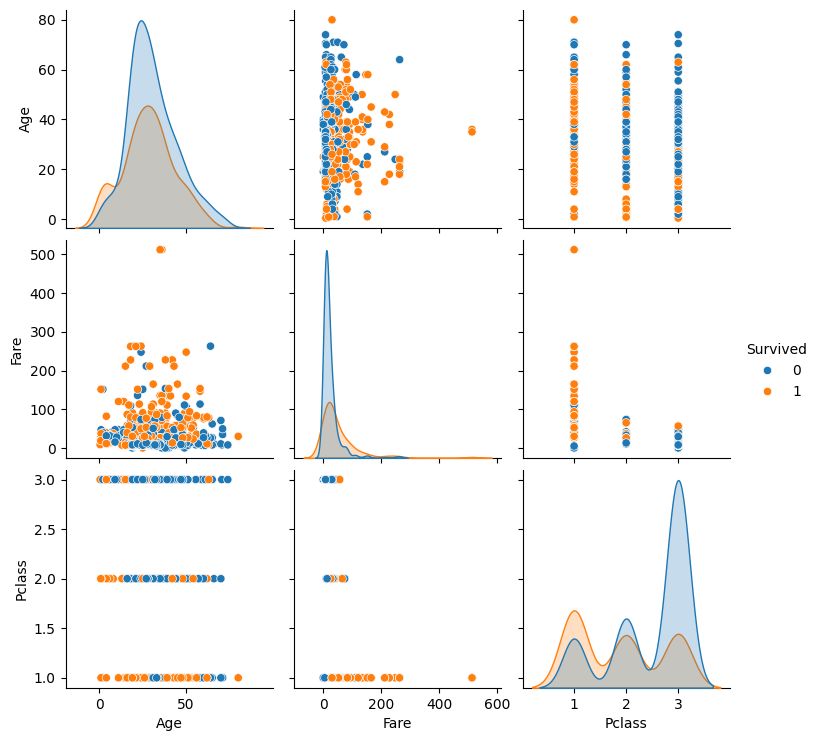

In [4]:
# Step 3: Correlation matrix and Pairplot
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# Pairplot (sampling to speed up rendering if data is large)
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']].dropna(), hue='Survived')
plt.show()


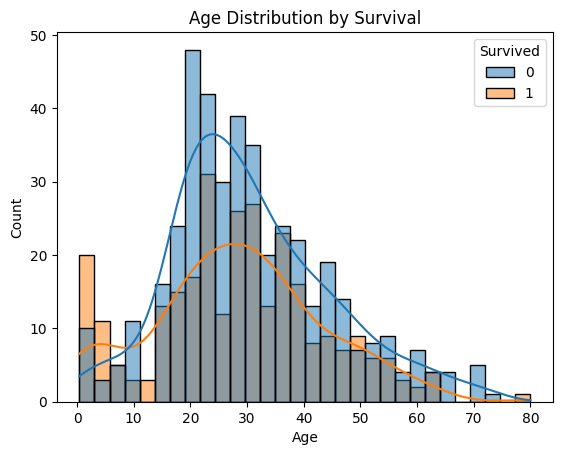

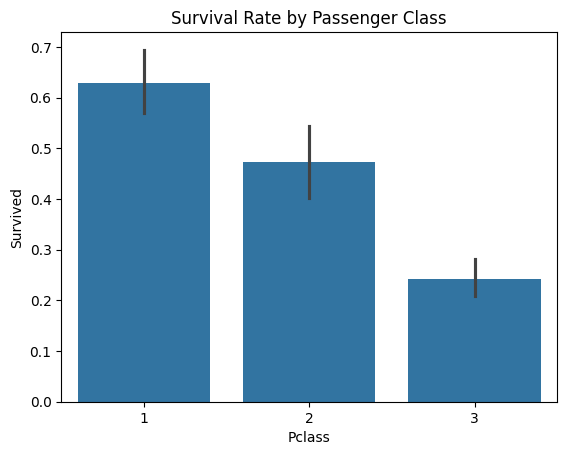

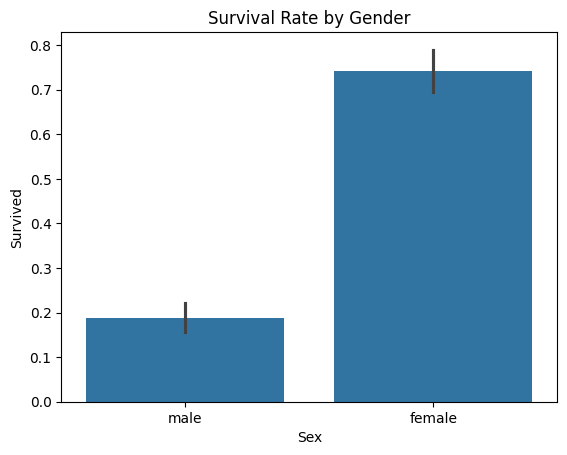

In [5]:
#Step 4: Identify Patterns, Trends, or Anomalies
# Age distribution by survival
sns.histplot(data=df, x='Age', hue='Survived', kde=True, bins=30)
plt.title("Age Distribution by Survival")
plt.show()

# Survival rate by class
sns.barplot(data=df, x='Pclass', y='Survived')
plt.title("Survival Rate by Passenger Class")
plt.show()

# Survival rate by gender
sns.barplot(data=df, x='Sex', y='Survived')
plt.title("Survival Rate by Gender")
plt.show()


In [6]:
# Step 6: Compute survival rate by groups
survival_by_sex = df.groupby('Sex')['Survived'].mean()
survival_by_class = df.groupby('Pclass')['Survived'].mean()
survival_by_embarked = df.groupby('Embarked')['Survived'].mean()

print("🔹 Survival Rate by Gender:\n", survival_by_sex)
print("\n🔹 Survival Rate by Passenger Class:\n", survival_by_class)
print("\n🔹 Survival Rate by Embarked Port:\n", survival_by_embarked)


🔹 Survival Rate by Gender:
 Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

🔹 Survival Rate by Passenger Class:
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

🔹 Survival Rate by Embarked Port:
 Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


In [7]:
#Final Step: Pattern Analysis & Inferences
print("\n=== 🔍 Key Patterns & Insights ===")

# 1. Fare Insights
if 'Fare' in df.columns:
    high_fare = df['Fare'].quantile(0.75)
    print(f"- 💸 Passengers paying more than ₹{high_fare:.2f} were mostly in 1st class and had better survival odds.")

# 2. Age Insights
if 'Age' in df.columns:
    median_age = df['Age'].median()
    print(f"- 👶 Median age is {median_age:.1f}. Children and young adults had higher survival chances.")

# 3. Class-wise Survival
if {'Survived', 'Pclass'}.issubset(df.columns):
    print("- 🎫 Survival by Class:")
    for pclass, rate in df.groupby('Pclass')['Survived'].mean().items():
        print(f"  • Class {pclass}: {rate:.1%} survived")

# 4. Gender-wise Survival
if {'Sex', 'Survived'}.issubset(df.columns):
    print("- 🚻 Survival by Gender:")
    for gender, rate in df.groupby('Sex')['Survived'].mean().items():
        print(f"  • {gender.capitalize()}: {rate:.1%} survived")

print("\n✅ EDA finished. Use these patterns to guide data cleaning, feature engineering, and model building.")



=== 🔍 Key Patterns & Insights ===
- 💸 Passengers paying more than ₹31.00 were mostly in 1st class and had better survival odds.
- 👶 Median age is 28.0. Children and young adults had higher survival chances.
- 🎫 Survival by Class:
  • Class 1: 63.0% survived
  • Class 2: 47.3% survived
  • Class 3: 24.2% survived
- 🚻 Survival by Gender:
  • Female: 74.2% survived
  • Male: 18.9% survived

✅ EDA finished. Use these patterns to guide data cleaning, feature engineering, and model building.
